---

<div align="center">

# 🐾 **Felis Taxonomy Classification | EfficientNetV2** 🐾  
### *Course Project - Deep Learning*

</div>

---

#### **`Part II | Fine Tuning`**

| **Author**        | Shagun                                          |
|--------------------|------------------------------------------------|
| **School**        | School of Computing & Data Science, Sai University |
| **Email ID**      | shagun.s-26@scds.saiuniversity.edu.in          |
| **Date Created**  | 26/12/2024                                     |

---

### **🔍 Project Overview**

- **Problem**: `Image Classification`
- **Dataset**: `Felis Taxonomy`
- **Model**: `EfficientNetV2`
- **Key Library Used**: `TensorFlow Keras`

---

### **📄 Description**

This section focuses on **Fine Tuning** to further improve the classification of **Felis (cat) images** into **7 types**, leveraging the pre-trained **EfficientNetV2 model**. Fine-tuning involves unfreezing certain layers of the feature extractor to allow specialized learning for the given dataset.

---

<div align="center">

✨ Happy Coding! ✨

</div>


## Downloading and preparing the data

In [1]:
# Import required libraries

import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

2.17.1


In [2]:
import os
import glob
import PIL
from PIL import Image

In [3]:
from google.colab import drive
import glob

# Mount Google Drive
drive.mount('/content/drive')

# from drive
imgFiles = glob.glob("/content/drive/MyDrive/Felis_Taxonomy/*/*.jpg")


Mounted at /content/drive


In [4]:
print(len(imgFiles))

519


In [5]:
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (10).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (1).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (18).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (26).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (24).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (20).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (2).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (27).jpg


In [6]:
# Since the model and datasets are already prepared, load them directly from Drive
# load numpy array from npy file
from numpy import load
X_train_std = load('/content/drive/MyDrive/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/Models/y_test.npy')
print(f"No. of training samples: {X_train_std.shape[0]}")
print(f"No. of testing samples: {X_test_std.shape[0]}")

No. of training samples: 389
No. of testing samples: 130


In [7]:
import os
print(os.listdir('/content/drive/MyDrive/Models'))


['EfficientNetV2_FineTuning_BestModel.keras', 'InceptionV3_TransferLearning_BestModel.keras', 'InceptionV3_FineTuning_BestModel.keras', 'DenseNet121_TransferLearning_BestModel.keras', 'DenseNet121_FineLearning_BestModel.keras', 'EfficientNetV2_TransferLearning_BestModel.keras', 'X_train_std.npy', 'X_test_std.npy', 'y_train.npy', 'y_test.npy']


In [8]:
import os
file_path = '/content/drive/MyDrive/Models/EfficientNetV2_TransferLearning_BestModel.keras'
if os.path.exists(file_path):
    print("File exists")
else:
    print("File not found")


File exists


In [9]:
# Load the model saved in the native Keras format
model3_FT = keras.models.load_model(file_path)
model3_FT.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, None, None, 3)  │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, None, None, 3)  │              0 │ rescaling_1[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 32) │            864 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 32) │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 32) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, None, None, 16) │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, None, None, 16) │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, None, None, 16) │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, None, None, 64) │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, None, None, 64) │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, None, None, 64) │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, None, None, 32) │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, None, None, 32) │            128 │ block2a_project_conv[… │
│ (BatchNormalization) 

 Total params: 5,950,058 (22.70 MB)

 Trainable params: 10,248 (40.03 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 20,498 (80.07 KB)

## Fine Tuning the model
In this Fine Tuning experiment, we set all the layers of the Feature Extractor as trainable so that they are updated during backpropagation

In [10]:
for layer in model3_FT.layers:
    layer.trainable = True

## Compiling and training the model

In [11]:
model3_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FT = [
             keras.callbacks.ModelCheckpoint("bestTL.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_FT = model3_FT.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_FT)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.2098 - loss: 2.0583 - val_accuracy: 0.0513 - val_loss: 2.2171
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.5248 - loss: 1.2848 - val_accuracy: 0.1538 - val_loss: 2.2626
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.7374 - loss: 0.7718 - val_accuracy: 0.0769 - val_loss: 5.3017
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.8654 - loss: 0.4719 - val_accuracy: 0.3590 - val_loss: 3.7188
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.9027 - loss: 0.2670 - val_accuracy: 0.4872 - val_loss: 1.9184
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9386 - loss: 0.1781 - val_accuracy: 0.1282 - val_loss: 6.2974
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.9322 - loss: 0.2237 - val_accuracy: 0.6923 - val_loss: 1.2370
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.9719 - loss: 0.0929 - val_accuracy: 0.

## Visualising the model's training accuracy

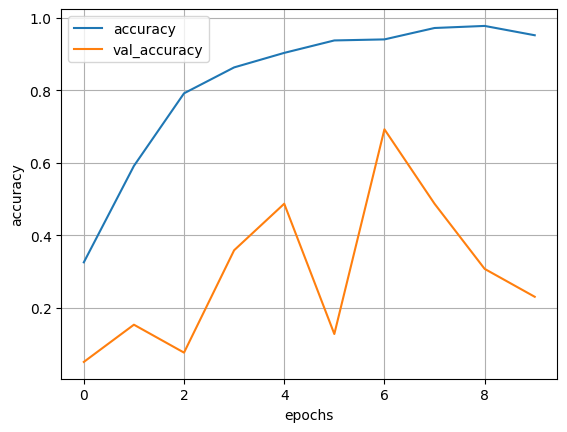

In [12]:
progress = {k:v for k,v in history_FT.history.items() if k in ['accuracy', 'val_accuracy']}

pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

## Evaluating the model

In [13]:
# Loading the model's best weights during training
model3_FT.load_weights("bestTL.weights.h5")

# Test loss and test accuracy
testLoss_FT, testAccuracy_FT = model3_FT.evaluate(x = X_test_std, y = y_test, batch_size=16)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 724ms/step - accuracy: 0.6272 - loss: 1.4471
Test-loss: 1.465935, Test-accuracy: 0.592308


In [14]:
# Making predictions on the test set

y_proba = model3_FT.predict(X_test_std)
y_pred = np.argmax(y_proba, axis=-1)
print(y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step
[2 4 4 4 0 1 1 5 5 1 3 0 0 1 0 0 6 0 0 4 4 3 1 6 2 1 3 5 2 4 1 5 6 2 4 1 3
 4 4 3 1 5 1 4 5 0 4 2 0 5 3 4 4 3 5 4 5 4 3 0 4 0 3 2 0 5 5 0 1 4 0 3 0 5
 5 0 3 2 4 6 0 5 3 5 1 5 5 6 5 4 6 2 5 5 6 3 5 4 5 0 3 5 1 5 1 1 3 0 0 0 0
 0 6 0 2 0 3 5 6 6 5 3 3 2 1 5 5 2 5 5]


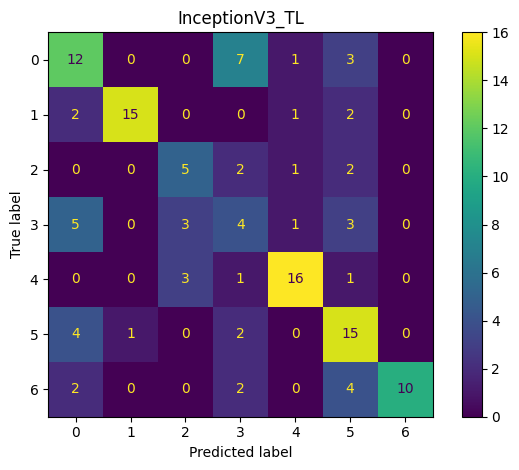

In [15]:
# Confusion Matrix of the model's predictions on the test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
cm.plot()
plt.title("InceptionV3_TL")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfMat_InceptionV3_TL.png", dpi=300, format='png', pad_inches=0.3)
plt.show()



In [16]:
# Classification report

from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        23
           1       0.94      0.75      0.83        20
           2       0.45      0.50      0.48        10
           3       0.22      0.25      0.24        16
           4       0.80      0.76      0.78        21
           5       0.50      0.68      0.58        22
           6       1.00      0.56      0.71        18

    accuracy                           0.59       130
   macro avg       0.63      0.57      0.59       130
weighted avg       0.64      0.59      0.60       130



In [17]:
# Save the model in the native Keras format
model3_FT.save('/content/drive/MyDrive/Models/EfficientNetV2_FineTuning_BestModel.keras')
